## Lab 5

In [4]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

### Zadanie 1

In [82]:
state = Statevector.from_int(0, 2**qnumber)

def init_wanderer():
    qc = QuantumCircuit(3)
    
    return qc

def coin(qc):
    qc.barrier()
    qc.h(0)

def increment(qc):
    qc.barrier()
    qc.ccx(control_qubit1=0, control_qubit2=1, target_qubit=2)
    qc.cx(control_qubit=0, target_qubit=1)
    
def decrement(qc):
    qc.barrier()
    qc.x(qubit=0)
    qc.x(qubit=1)
    qc.ccx(control_qubit1=0, control_qubit2=1, target_qubit=2)
    qc.x(qubit=1)
    qc.cx(control_qubit=0, target_qubit=1)
    qc.x(qubit=0)
    
def single_step(qc):
    coin(qc)
    increment(qc)
    decrement(qc)
    
def wanderer_with_n_steps(n):
    qc = init_wanderer()
    for _ in range(n):
        single_step(qc)
                
    return qc


def circuit_latex(qc):
    state = Statevector.from_int(0, 2**3)
    state = state.evolve(qc)

    return state.draw('latex')
    
def measure_on_aer(circuit):
    qc = circuit.copy()
    aer_sim = Aer.get_backend('aer_simulator')
    qc.measure_all()
    qobj = assemble(qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts(qc)
    return plot_histogram(counts)

In [104]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

IBMQ.load_account()

def run_circuit(circuit):
    qc = circuit.copy()
    qc.measure_all()
    shots = 1024

    # Get the least busy backend
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                           and not x.configuration().simulator 
                                           and x.status().operational==True))
    print("least busy backend: ", backend)
    t_qc = transpile(qc, backend, optimization_level=3)
    job = backend.run(t_qc)
    
    result = job.result()
    return plot_histogram(result.get_counts(qc))

ibmqfactory.load_account:WARNING:2022-04-09 21:02:03,044: Credentials are already in use. The existing account in the session will be replaced.


### One Wanderer

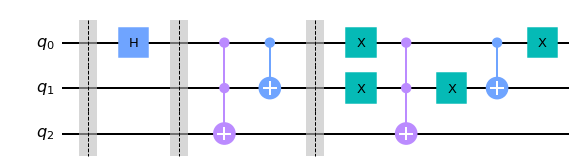

In [101]:
one_wanderer_qc = wanderer_with_n_steps(1)
one_wanderer_qc.draw()

In [84]:
circuit_latex(one_wanderer_qc)

<IPython.core.display.Latex object>

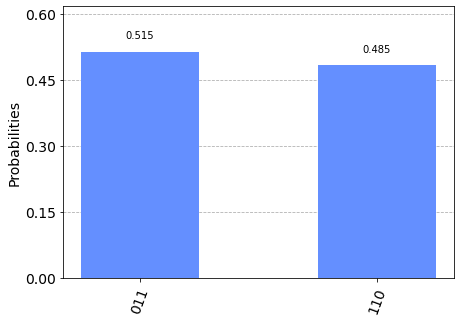

In [85]:
measure_on_aer(one_wanderer_qc)

least busy backend:  ibmq_lima


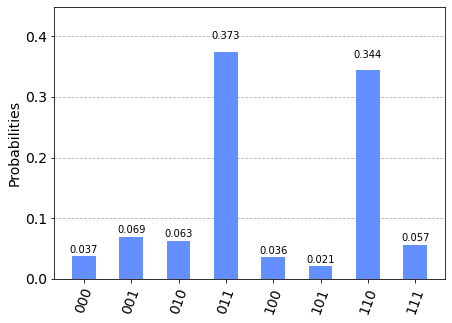

In [105]:
run_circuit(one_wanderer_qc)

### Two Wanderers

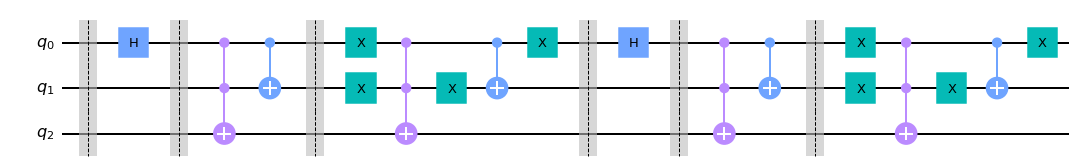

In [86]:
two_wanderers_qc = wanderer_with_n_steps(2)
two_wanderers_qc.draw()

In [89]:
circuit_latex(two_wanderers_qc)

<IPython.core.display.Latex object>

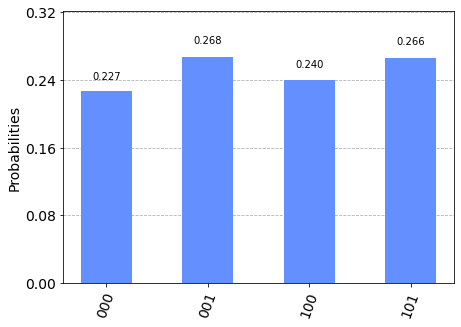

In [90]:
measure_on_aer(two_wanderers_qc)

least busy backend:  ibmq_lima


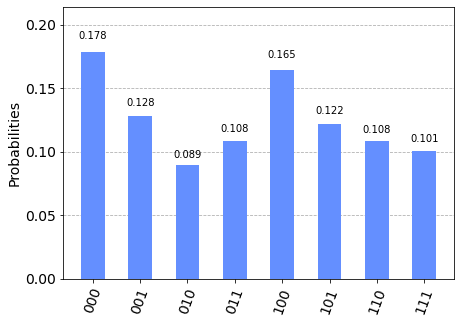

In [106]:
run_circuit(two_wanderers_qc)

### Three Wanderers

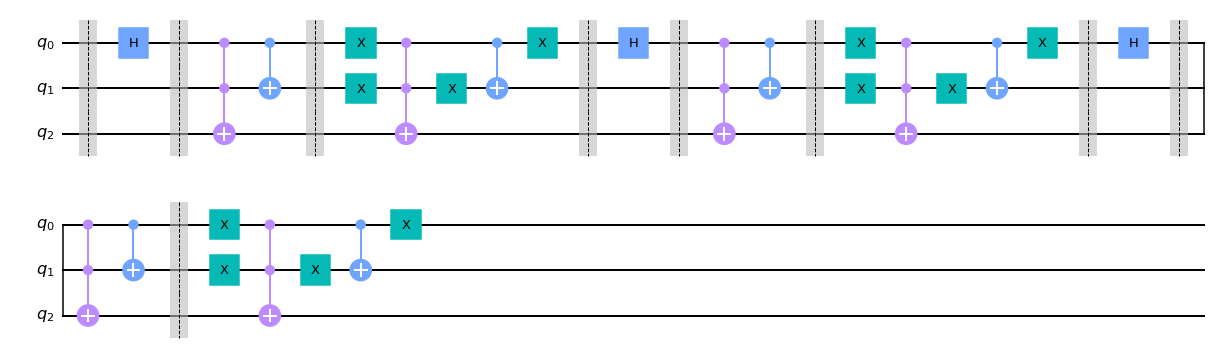

In [95]:
three_wanderers_qc = wanderer_with_n_steps(3)
three_wanderers_qc.draw()

In [96]:
circuit_latex(three_wanderers_qc)

<IPython.core.display.Latex object>

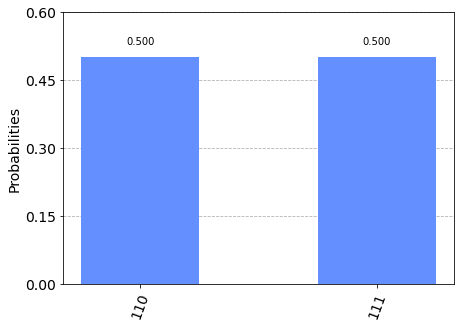

In [97]:
measure_on_aer(three_wanderers_qc)

least busy backend:  ibmq_lima


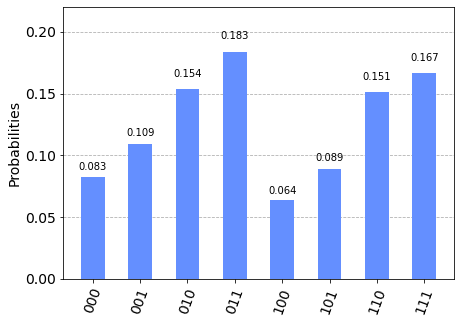

In [107]:
run_circuit(three_wanderers_qc)